First 5 Rows:
         date   open   high    low  close    volume name
0  2013-02-08  15.07  15.12  14.63  14.75   8407500  AAL
1  2013-02-11  14.89  15.01  14.26  14.46   8882000  AAL
2  2013-02-12  14.45  14.51  14.10  14.27   8126000  AAL
3  2013-02-13  14.30  14.94  14.25  14.66  10259500  AAL
4  2013-02-14  14.94  14.96  13.16  13.99  31879900  AAL

Missing Values:
date       0
open      11
high       8
low        8
close      0
volume     0
name       0
dtype: int64

Descriptive Statistics:
                open           high            low          close  \
count  619029.000000  619032.000000  619032.000000  619040.000000   
mean       83.023334      83.778311      82.256096      83.043763   
std        97.378769      98.207519      96.507421      97.389748   
min         1.620000       1.690000       1.500000       1.590000   
25%        40.220000      40.620000      39.830000      40.245000   
50%        62.590000      63.150000      62.020000      62.620000   
75%        94.3

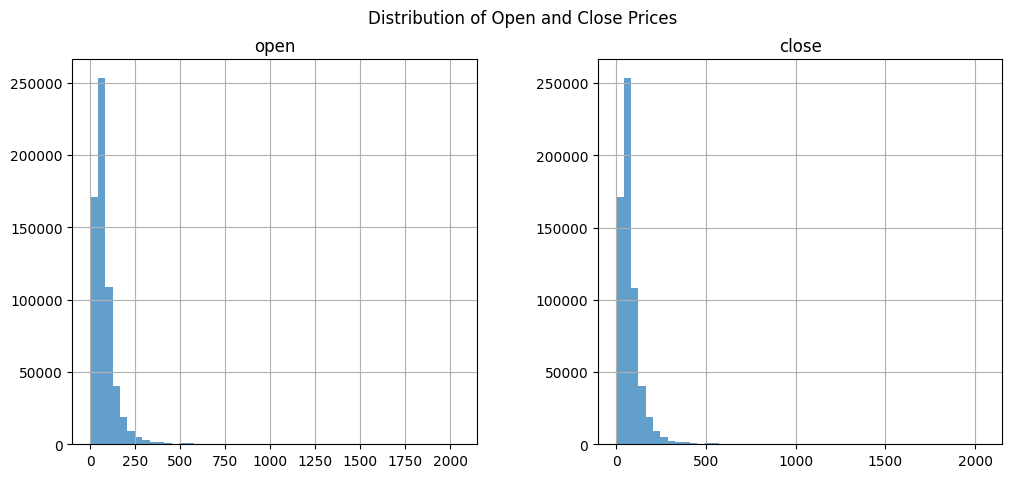


Correlation Matrix:
            open      high       low     close    volume
open    1.000000  0.999939  0.999928  0.999872 -0.142705
high    0.999939  1.000000  0.999903  0.999936 -0.142316
low     0.999928  0.999903  1.000000  0.999939 -0.143239
close   0.999872  0.999936  0.999939  1.000000 -0.142802
volume -0.142705 -0.142316 -0.143239 -0.142802  1.000000


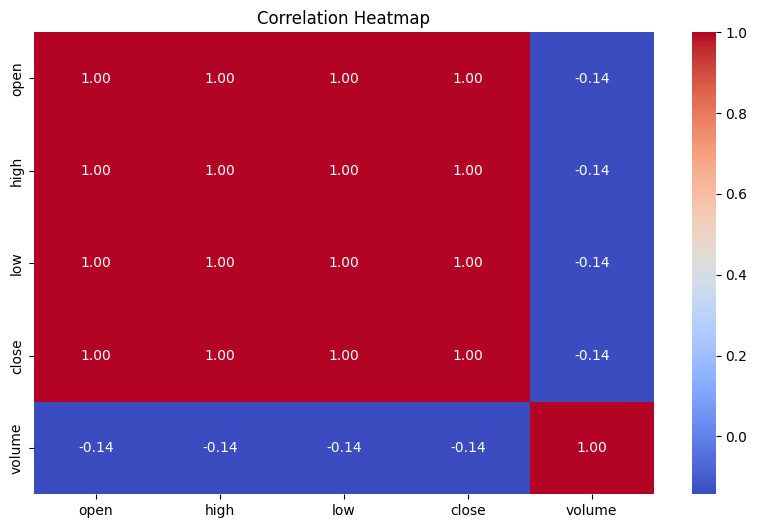


Top 10 Frequent Stocks:
name
ZTS     1259
AAL     1259
AAPL    1259
AAP     1259
ABBV    1259
ABC     1259
ABT     1259
ACN     1259
ADBE    1259
WM      1259
Name: count, dtype: int64


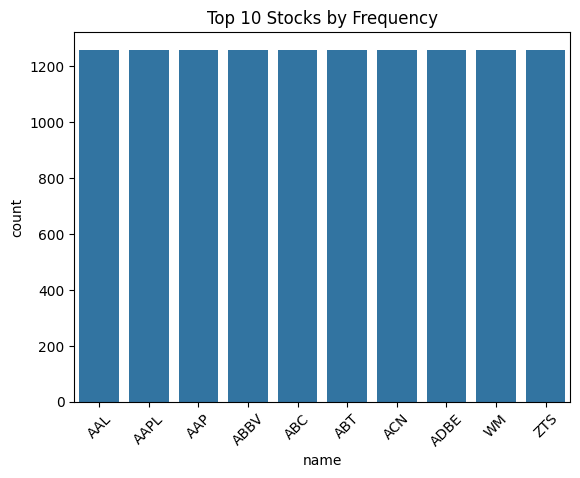

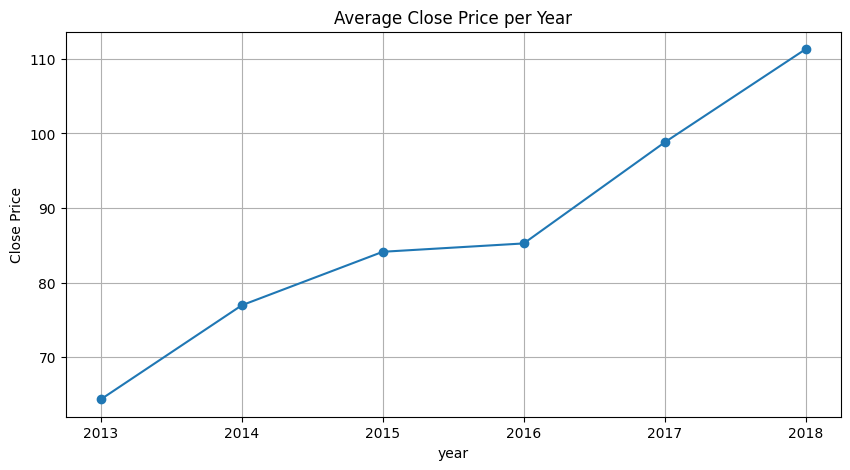


Linear Regression MSE: 0.47
Decision Tree MSE: 1.06
Random Forest MSE: 0.57


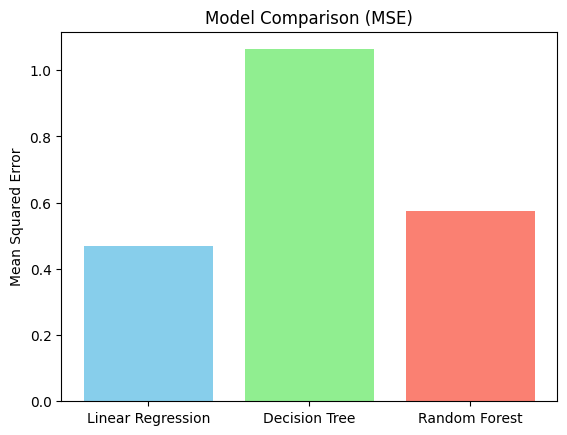

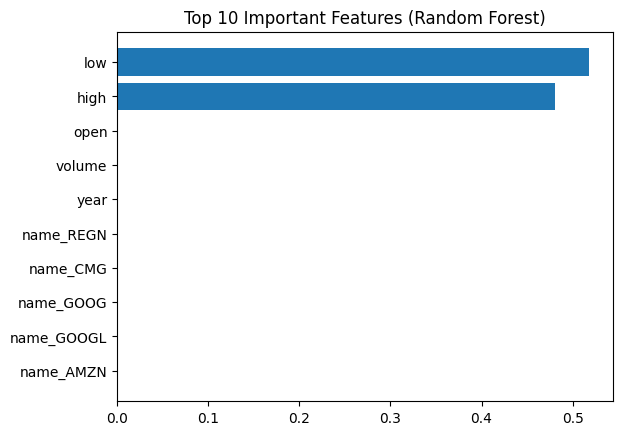

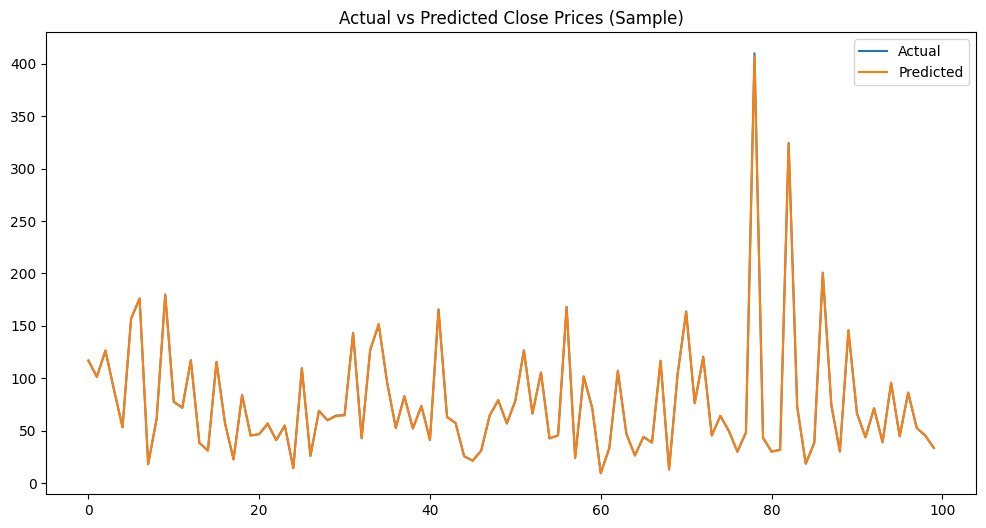

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load dataset
df = pd.read_csv('all_stocks_5yr.csv')

# Task 1: Convert all column names to lowercase
df.columns = df.columns.str.lower()

# Task 2: Inspect first few rows
print("First 5 Rows:")
print(df.head())

# Task 3: Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Task 4: Basic statistics
print("\nDescriptive Statistics:")
print(df.describe())

# Task 5: Visualize distributions of 'open' and 'close' prices
df[['open', 'close']].hist(bins=50, figsize=(12, 5), alpha=0.7)
plt.suptitle("Distribution of Open and Close Prices")
plt.show()

# Task 6: Correlation matrix
numeric_df = df.select_dtypes(include=np.number)
corr_matrix = numeric_df.corr()
print("\nCorrelation Matrix:")
print(corr_matrix)

# Task 7: Heatmap of correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Task 8: Top 10 frequent stocks
top_10 = df['name'].value_counts().nlargest(10)
print("\nTop 10 Frequent Stocks:")
print(top_10)
sns.countplot(data=df[df['name'].isin(top_10.index)], x='name')
plt.xticks(rotation=45)
plt.title("Top 10 Stocks by Frequency")
plt.show()

# Task 9: Time trend of average close price by year
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
avg_close_by_year = df.groupby('year')['close'].mean()
avg_close_by_year.plot(marker='o', figsize=(10, 5))
plt.title("Average Close Price per Year")
plt.ylabel("Close Price")
plt.grid(True)
plt.show()

# Task 10: Feature engineering and preprocessing
df_encoded = pd.get_dummies(df, columns=['name'], drop_first=True)
features = ['open', 'high', 'low', 'volume', 'year'] + [col for col in df_encoded.columns if col.startswith('name_')]
df_encoded = df_encoded[features + ['close']]

# Drop rows with any NaNs
df_encoded = df_encoded.dropna()

X = df_encoded[features]
y = df_encoded['close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Task 11: Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_preds)
print(f"\nLinear Regression MSE: {lr_mse:.2f}")

# Task 12: Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
dt_preds = dt.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_preds)
print(f"Decision Tree MSE: {dt_mse:.2f}")

# Task 13: Random Forest Regressor (default params)
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_preds)
print(f"Random Forest MSE: {rf_mse:.2f}")

# Task 14: Model comparison visualization
mse_scores = {'Linear Regression': lr_mse, 'Decision Tree': dt_mse, 'Random Forest': rf_mse}
plt.bar(mse_scores.keys(), mse_scores.values(), color=['skyblue', 'lightgreen', 'salmon'])
plt.title("Model Comparison (MSE)")
plt.ylabel("Mean Squared Error")
plt.show()

# Task 15: Feature Importance from Random Forest
importances = rf.feature_importances_
top_idx = np.argsort(importances)[-10:]
plt.barh(range(10), importances[top_idx])
plt.yticks(range(10), [X.columns[i] for i in top_idx])
plt.title("Top 10 Important Features (Random Forest)")
plt.show()

# Task 16: Actual vs Predicted Close Prices (sample)
plt.figure(figsize=(12, 6))
plt.plot(y_test.values[:100], label='Actual')
plt.plot(rf_preds[:100], label='Predicted')
plt.title("Actual vs Predicted Close Prices (Sample)")
plt.legend()
plt.show()
